In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [13]:
df = pd.read_csv('CSV2.csv') # reads the csv and creates the dataframe called movie
df.head(n=2)
# pd.read_csv('file.csv')

,id,age,birthdate,sex,salary,size,breakfast,lunch,dinner,late,...,shabu,grill,steak,fastfood,cake,dessert,coffee,juice,created_at,user_id
0,1,21,1996-07-19,male,"น้อยกว่า 10,000",fit,f,t,t,f,...,f,f,t,t,t,t,f,t,2018-02-12 10:15:15.007524+00,4
1,2,20,1998-02-13,female,"น้อยกว่า 10,000",thin,f,t,t,t,...,f,f,f,t,t,f,f,f,2018-02-18 04:35:55.301258+00,23


In [14]:
df2=df.drop(['id','birthdate','created_at','user_id'],1)
sex = {'male':0,'female':1}
size={'thin':0,'fit':1,'chubby':2,'fat':3}
salary={'น้อยกว่า 10,000':0,'10,000-19,999':1,'20,000-29,999':2,'30,000-39,999':3,'40,000-49,999':4,'50,000 ขึ้นไป':5}
breakfast = {'f':0,'t':1}
lunch = {'f':0,'t':1}
dinner = {'f':0,'t':1}
late = {'f':0,'t':1}
taste = {'f':0,'t':1}
price = {'f':0,'t':1}
service = {'f':0,'t':1}
clean = {'f':0,'t':1}
at = {'f':0,'t':1}
location = {'f':0,'t':1}
facebook = {'f':0,'t':1}
twitter = {'f':0,'t':1}
instagram = {'f':0,'t':1}
line = {'f':0,'t':1}
japanese = {'f':0,'t':1}
thai = {'f':0,'t':1}
diet = {'f':0,'t':1}
shabu = {'f':0,'t':1}
grill = {'f':0,'t':1}
steak = {'f':0,'t':1}
fastfood = {'f':0,'t':1}
cake = {'f':0,'t':1}
dessert = {'f':0,'t':1}
coffee = {'f':0,'t':1}
juice = {'f':0,'t':1}

for k,i in df2.iterrows():
    if i['sex']==i['sex']:
        df2.loc[k,"sexc"]=sex[i['sex']]
    if i['size']==i['size']:
        df2.loc[k,"sizec"]=size[i['size']]
    if i['salary']==i['salary']:
        df2.loc[k,"salaryc"]=salary[i['salary']]
    if i['breakfast']==i['breakfast']:
        df2.loc[k,"breakfastc"]=breakfast[i['breakfast']]
    if i['lunch']==i['lunch']:
        df2.loc[k,"lunchc"]=lunch[i['lunch']]
    if i['dinner']==i['dinner']:
        df2.loc[k,"dinnerc"]=breakfast[i['dinner']]
    if i['late']==i['late']:
        df2.loc[k,"latec"]=late[i['late']]
    if i['taste']==i['taste']:
        df2.loc[k,"tastec"]=taste[i['taste']]
    if i['price']==i['price']:
        df2.loc[k,"pricec"]=price[i['price']]
    if i['service']==i['service']:
        df2.loc[k,"servicec"]=service[i['service']]
    if i['clean']==i['clean']:
        df2.loc[k,"cleanc"]=clean[i['clean']]
    if i['at']==i['at']:
        df2.loc[k,"atc"]=at[i['at']]
    if i['location']==i['location']:
        df2.loc[k,"locationc"]=location[i['location']]
    if i['facebook']==i['facebook']:
        df2.loc[k,"facebookc"]=facebook[i['facebook']]
    if i['twitter']==i['twitter']:
        df2.loc[k,"twitterc"]=twitter[i['twitter']]
    if i['instagram']==i['instagram']:
        df2.loc[k,"instagramc"]=instagram[i['instagram']]
    if i['line']==i['line']:
        df2.loc[k,"linec"]=line[i['line']]
    if i['japanese']==i['japanese']:
        df2.loc[k,"japanesec"]=japanese[i['japanese']]
    if i['thai']==i['thai']:
        df2.loc[k,"thaic"]=thai[i['thai']]
    if i['diet']==i['diet']:
        df2.loc[k,"dietc"]=diet[i['diet']]
    if i['shabu']==i['shabu']:
        df2.loc[k,"shabuc"]=shabu[i['shabu']]
    if i['grill']==i['grill']:
        df2.loc[k,"grillc"]=grill[i['grill']]
    if i['steak']==i['steak']:
        df2.loc[k,"steakc"]=steak[i['steak']]
    if i['fastfood']==i['fastfood']:
        df2.loc[k,"fastfoodc"]=fastfood[i['fastfood']]
    if i['cake']==i['cake']:
        df2.loc[k,"cakec"]=grill[i['cake']]
    if i['dessert']==i['dessert']:
        df2.loc[k,"dessertc"]=dessert[i['dessert']]
    if i['coffee']==i['coffee']:
        df2.loc[k,"coffeec"]=coffee[i['coffee']]
    if i['juice']==i['juice']:
        df2.loc[k,"juicec"]=juice[i['juice']]

In [15]:
df2=df2.drop(['sex','size','salary'
            ,'breakfast','lunch','dinner','late','taste','price','service','clean',
            'at','location','facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill',
            'steak','fastfood','cake','dessert','coffee','juice'],1)
df2.head()

,age,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,pricec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
0,21,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,20,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,22,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,19,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,18,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [16]:
f1 = df2['salaryc'].values
f2 = df2['age'].values
f3 = df2['sexc'].values
f4 = df2['salaryc'].values
f5 = df2['breakfastc'].values
f6 = df2['lunchc'].values
f7 = df2['dinnerc'].values
f8 = df2['shabuc'].values
f9 = df2['grillc'].values
f10 = df2['steakc'].values
f11 = df2['fastfoodc'].values
f12 = df2['cakec'].values
f13 = df2['dessertc'].values
f14 = df2['coffeec'].values
f15 = df2['juicec'].values
# X = np.array(list(zip(f4,f5)))
X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [17]:
X_std

array([[-0.34491316,  0.12355154, -2.11147658, ...,  0.91927712,
        -0.55677644,  1.07123339],
       [-0.34491316, -0.04330673,  0.47360222, ..., -1.08781126,
        -0.55677644, -0.93350339],
       [-0.34491316,  0.29040981,  0.47360222, ...,  0.91927712,
        -0.55677644,  1.07123339],
       ...,
       [-0.34491316,  0.12355154,  0.47360222, ..., -1.08781126,
        -0.55677644,  1.07123339],
       [-0.34491316,  0.12355154,  0.47360222, ...,  0.91927712,
        -0.55677644,  1.07123339],
       [ 1.11262311, -0.37702326,  0.47360222, ...,  0.91927712,
        -0.55677644, -0.93350339]])

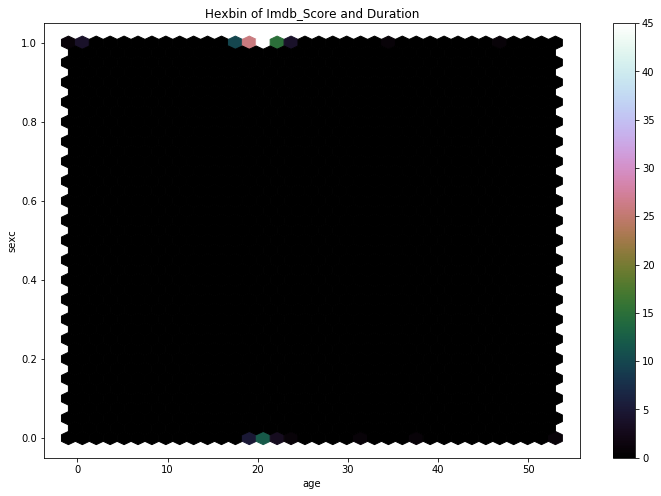

In [18]:
df2.plot(y= 'sexc', x ='age',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration',figsize=(12,8))


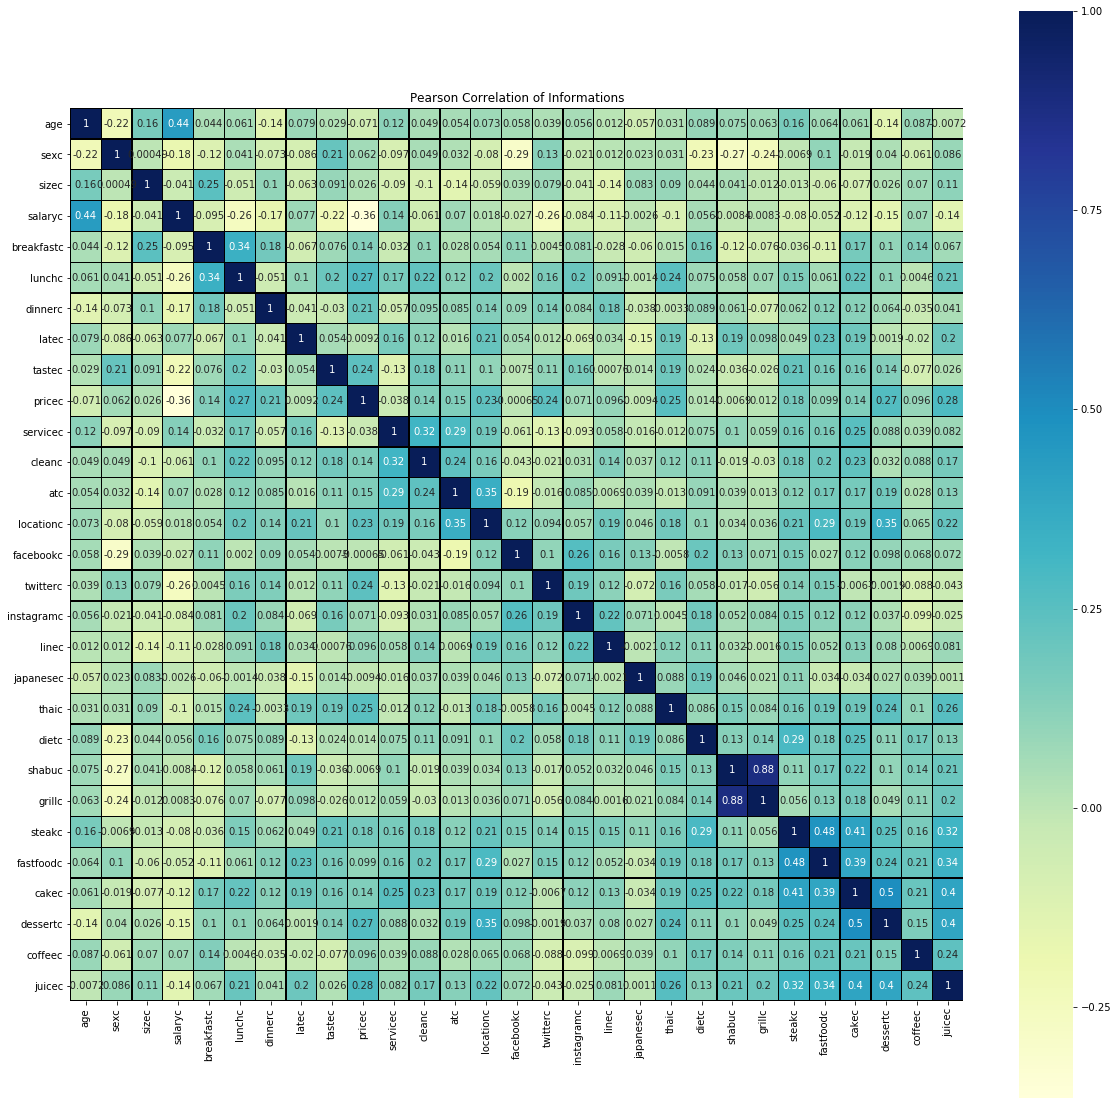

In [19]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
plt.title('Pearson Correlation of Informations')
# Draw the heatmap using seaborn
sns.heatmap(df2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [20]:
f1 = df2['salaryc'].values
f2 = df2['age'].values
f3 = df2['sexc'].values
f4 = df2['salaryc'].values
f5 = df2['breakfastc'].values
f6 = df2['lunchc'].values
f7 = df2['dinnerc'].values
f8 = df2['shabuc'].values
f9 = df2['grillc'].values
f10 = df2['steakc'].values
f11 = df2['fastfoodc'].values
f12 = df2['cakec'].values
f13 = df2['dessertc'].values
f14 = df2['coffeec'].values
f15 = df2['juicec'].values
X = np.array(list(zip(f2,f1)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


NameError: name 'DBSCAN' is not defined

In [ ]:
f1 = df2['salaryc'].values
f2 = df2['age'].values
f3 = df2['sexc'].values
f4 = df2['salaryc'].values
f5 = df2['breakfastc'].values
f6 = df2['lunchc'].values
f7 = df2['dinnerc'].values
f8 = df2['shabuc'].values
f9 = df2['grillc'].values
f10 = df2['steakc'].values
f11 = df2['fastfoodc'].values
f12 = df2['cakec'].values
f13 = df2['dessertc'].values
f14 = df2['coffeec'].values
f15 = df2['juicec'].values
X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# print(labels)


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
n_clusters_

In [ ]:
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,random_state=0)
# print(X)
# print("labels_true",labels_true)

In [ ]:
df = pd.read_csv('session_csv.csv') # reads the csv and creates the dataframe called movie
df.head(n=2)

In [ ]:
df.plot.hist(alpha=0.5)

In [ ]:
df_time = pd.to_datetime(df["created_at"])

df_time = (df_time.dt.hour*60+df_time.dt.minute)*60 + df_time.dt.second


In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

f14 = df['id'].values
# f15 = df2['juicec'].values
X = np.array(list(zip(f14,df_time)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Session


In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('session_csv.csv') # reads the csv and creates the dataframe called movie
df.head(n=2)
df2=df.drop(['id','user_id','value'],1)
action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
          'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}


for k,i in df2.iterrows():
    if i['action']==i['action']:
        df2.loc[k,"actionc"]=action[i['action']]
   

In [2]:
df.head()

,id,action,value,created_at,user_id
0,1144,enter,home,2018-02-21 08:30:45.169158+00,52
1,1148,enter,home,2018-02-21 10:07:01.98235+00,52
2,1152,เพิ่มเข้าตะกร้า,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527+00,52
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.73492+00,52
4,411,enter,home,2018-02-16 10:25:31.747361+00,18


In [45]:
df['created_at'] = pd.to_datetime(df["created_at"])

df2['created_atc']=df['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')

In [4]:
df2.head()

,action,created_at,actionc,created_atc
0,enter,2018-02-21 08:30:45.169158+00,0.0,2018-02-21 15:30:45.169158+07:00
1,enter,2018-02-21 10:07:01.98235+00,0.0,2018-02-21 17:07:01.982350+07:00
2,เพิ่มเข้าตะกร้า,2018-02-21 10:10:14.041527+00,2.0,2018-02-21 17:10:14.041527+07:00
3,สั่งอาหาร,2018-02-21 10:15:29.73492+00,3.0,2018-02-21 17:15:29.734920+07:00
4,enter,2018-02-16 10:25:31.747361+00,0.0,2018-02-16 17:25:31.747361+07:00


In [5]:
df_time = pd.to_datetime(df2["created_atc"])
day  = df_time.dt.day
date = df_time.dt.date
hour = df_time.dt.hour
df2['hourc'] = hour

In [46]:
df2.head()

,action,created_at,actionc,created_atc
0,enter,2018-02-21 08:30:45.169158+00,0.0,2018-02-21 15:30:45.169158+07:00
1,enter,2018-02-21 10:07:01.98235+00,0.0,2018-02-21 17:07:01.982350+07:00
2,เพิ่มเข้าตะกร้า,2018-02-21 10:10:14.041527+00,2.0,2018-02-21 17:10:14.041527+07:00
3,สั่งอาหาร,2018-02-21 10:15:29.73492+00,3.0,2018-02-21 17:15:29.734920+07:00
4,enter,2018-02-16 10:25:31.747361+00,0.0,2018-02-16 17:25:31.747361+07:00


In [7]:
f1 = df2['actionc'].values
f2 = df2['hourc'].values
X = np.array(list(zip(f2,f1)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)
#
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


62
Estimated number of clusters: 62


MemoryError: 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
# ts = pd.Series(df2['actionc'].values, index=pd.date_range(date, periods=1000))
# ts = ts.cumsum()
# ts.plot()

In [ ]:
# df = df.sort_values('date', ascending=True)
plt.plot( date,df2['actionc'],)
plt.xticks(rotation='vertical')

In [ ]:
df2.plot.bar(stacked=True);

In [ ]:
import matplotlib.pyplot as plt
# ax = df[['actionc']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("Hour", fontsize=12)
# ax.set_ylabel("V", fontsize=12)
# plt.show()
# df2.plot(x="actionc", y="created_at", kind="bar")
df_group = df = pd.crosstab(date[10:], df2['actionc']) 

df_group.plot.bar(figsize=(20,30))

In [ ]:
# df = pd.read_csv('session_csv.csv') # reads the csv and creates the dataframe called movie
# df.head(n=2)
# df2=df2.drop(['id','user_id','value'],1)
action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
          'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}

for k,i in df2.iterrows():
    if i['action']==i['action']:
        df2.loc[k,"actionc"]=action[i['action']]
   

In [ ]:
df2.head()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
f1 = df2['actionc'].values
f2 = df2['hourc'].values
X = np.array(list(zip(f2,f1)))
# X = np.array(list(zip(f2,f3)))
hpc = PCA(n_components=2).fit_transform(X)
k_means = KMeans()
k_means.fit(hpc)

x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min(), hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize=4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:

# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c= label_color, alpha=0.5) 
plt.show()

In [ ]:
df.head()
df2.head()

In [ ]:
# df2.set_index("hourc",drop=True,inplace=True)
# df2.plot.bar()
# plt.show()

In [ ]:
df2["hourc"].value_counts().plot(kind = "bar")
# df2.plot.bar(x='hourc')
# plt.show()

In [ ]:
df3_drop2=df2.drop(['action','created_at','created_atc'],1)

In [ ]:
df3_drop2.head()

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))
plt.title('Pearson Correlation of Informations')
# Draw the heatmap using seaborn
sns.heatmap(df3_drop2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [ ]:
df3_drop2["hourc"].value_counts().plot(kind = "bar")


In [ ]:
df3_drop2["actionc"].value_counts().plot(kind = "bar")


In [ ]:
activity_duration = df3_drop2.groupby('hourc')['actionc'].sum()

In [ ]:
activity_duration

In [ ]:
test=pd.DataFrame(activity_duration)
check=test.reset_index(inplace=True)
# check
test

In [ ]:
test['actionc']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
test.boxplot(column="hourc",by="actionc")

In [ ]:
# test.hist(column="hourc",by="actionc",bins=30)
test.plot.hist(alpha=1)

In [ ]:
# df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
# df = df.cumsum()

test.plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

plt.show()

In [ ]:
# plt.figure(figsize = (20,20))

test.plot(style='.-', markevery=5,figsize = (10,7))
plt.xlabel('hour (s)', fontsize=18)
plt.ylabel('amount of session' ,fontsize=18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [43]:
df

,id,name,email,phone_number,address,picture,created_at,user_id
0,65,cher,surattana.sst@gmail.com,None,None,profilePicture/default_NujYRnn.jpg,2018-02-23 16:47:48.330135+00,67
1,41,Fah,fahsapin@hotmail.com,None,None,profilePicture/FahPanchakunathorn_social.jpg,2018-02-20 10:56:27.425017+00,43
2,27,จ๋า,octoberror@gmail.com,None,None,profilePicture/99daa35c18d14695_social.jpg,2018-02-19 10:19:34.835001+00,29
3,39,Weepawee,paweeuacharoensri@gmail.com,None,None,profilePicture/default_a7BzQwz.jpg,2018-02-20 09:08:18.222371+00,41
4,28,Dew'e,dominic_19462@hotmail.com,None,None,profilePicture/DeweDew_social.jpg,2018-02-19 11:01:38.390812+00,30
5,5,Thanupol,osan.shiori@windowslive.com,None,None,profilePicture/ThanupolCherdvorapong_social_L7...,2018-02-06 13:42:52.045278+00,6
6,29,Pumpim,NaN,None,None,profilePicture/PumpimParichat_social.jpg,2018-02-19 11:10:37.648574+00,31
7,57,Ramita,gedfah@gmail.com,None,None,profilePicture/avatar_efXcGzW.jpgsz50,2018-02-22 07:57:48.454371+00,59
8,30,Bammy,bam_nilove@hotmail.com,None,None,profilePicture/BammyUssariya_social.jpg,2018-02-19 14:41:28.739299+00,32
9,14,Toey,NaN,None,None,profilePicture/ToeyJittimongkon_social.jpg,2018-02-10 16:01:48.265212+00,17


In [83]:
df2.groupby('สั่งอาหาร').count()

KeyError: 'สั่งอาหาร'

In [85]:
x = df.groupby('action').count()


         id     action value                 created_at  user_id
3      1160  สั่งอาหาร    76 2018-02-21 10:15:29.734920       52
7       414  สั่งอาหาร    47 2018-02-16 10:27:35.459889       18
12      419  สั่งอาหาร    48 2018-02-16 10:34:29.828512       18
69      555  สั่งอาหาร    57 2018-02-17 10:25:10.492441       17
74      489  สั่งอาหาร    50 2018-02-16 15:46:14.582980       18
83      566  สั่งอาหาร    59 2018-02-17 10:42:57.362691       21
111     588  สั่งอาหาร    60 2018-02-18 12:07:17.467943       26
303     941  สั่งอาหาร    74 2018-02-20 14:16:10.418375       46
364    1179  สั่งอาหาร    77 2018-02-21 12:32:18.803217       53
396    1216  สั่งอาหาร    78 2018-02-21 14:46:08.346778       56
411    1231  สั่งอาหาร    79 2018-02-21 14:50:40.544001       57
477    1330  สั่งอาหาร    82 2018-02-22 11:39:16.568993       63
537    1402  สั่งอาหาร    84 2018-02-23 12:13:13.577960       37
586    1461  สั่งอาหาร    85 2018-02-24 10:17:55.488751       71
645    1525  สั่งอาหาร   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = 
y =

plt.scatter(x, y)
plt.show()

In [49]:
df.groupby('action').count()


,id,value,created_at,user_id
action,,,,
click recommended menu,5,5,5,5
click recommended menues,1,1,1,1
click_genetic_rec,13,13,13,13
enter,2858,2858,2858,2858
enter_store,1803,1803,1803,1803
like,13,13,13,13
search_cate,471,471,471,471
search_input,41,17,41,41
กรอกประวัติความหิว,136,136,136,136


In [51]:
user_id = df.groupby('user_id').count()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]

py.iplot(data, filename='basic-bar')

In [25]:

df3 = pd.read_csv('profile_csv.csv') # reads the csv and creates the dataframe called movie
df3.head()
# df2=df.drop(['id','user_id','value'],1)
# action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
#           'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}


# for k,i in df2.iterrows():
#     if i['action']==i['action']:
#         df2.loc[k,"actionc"]=action[i['action']]

,id,name,email,phone_number,address,picture,created_at,user_id
0,65,cher,surattana.sst@gmail.com,None,None,profilePicture/default_NujYRnn.jpg,2018-02-23 16:47:48.330135+00,67
1,41,Fah,fahsapin@hotmail.com,None,None,profilePicture/FahPanchakunathorn_social.jpg,2018-02-20 10:56:27.425017+00,43
2,27,จ๋า,octoberror@gmail.com,None,None,profilePicture/99daa35c18d14695_social.jpg,2018-02-19 10:19:34.835001+00,29
3,39,Weepawee,paweeuacharoensri@gmail.com,None,None,profilePicture/default_a7BzQwz.jpg,2018-02-20 09:08:18.222371+00,41
4,28,Dew'e,dominic_19462@hotmail.com,None,None,profilePicture/DeweDew_social.jpg,2018-02-19 11:01:38.390812+00,30


In [ ]:
list(my_dataframe.columns.values)

In [39]:
list_id=list(df3.user_id.values)

In [40]:
list_id.sort(key=int)

In [60]:
user_id

,id,action,value,created_at
user_id,,,,
17,22,22,22,22
18,93,93,93,93
19,17,17,17,17
20,4,4,4,4
21,5,5,5,5
22,3,3,3,3
23,37,37,37,37
25,1,1,1,1
26,13,13,13,13


In [68]:
new_list = df['user_id'].unique().tolist()
plot_list = []
j= 0

for i in user_id.id :
    dic={'user_id': 0 , 'count_session': 0}
    dic['user_id'] = new_list[j]
    dic['count_session'] = i
    plot_list.append(dic)
    j = j +1
    


In [122]:
test

,id,action,value,created_at,user_id
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.734920,52
7,414,สั่งอาหาร,47,2018-02-16 10:27:35.459889,18
12,419,สั่งอาหาร,48,2018-02-16 10:34:29.828512,18
69,555,สั่งอาหาร,57,2018-02-17 10:25:10.492441,17
74,489,สั่งอาหาร,50,2018-02-16 15:46:14.582980,18
83,566,สั่งอาหาร,59,2018-02-17 10:42:57.362691,21
111,588,สั่งอาหาร,60,2018-02-18 12:07:17.467943,26
303,941,สั่งอาหาร,74,2018-02-20 14:16:10.418375,46
364,1179,สั่งอาหาร,77,2018-02-21 12:32:18.803217,53
396,1216,สั่งอาหาร,78,2018-02-21 14:46:08.346778,56


In [120]:
test = df.loc[df['action'] == 'สั่งอาหาร']

t = test['user_id'].value_counts()
t

54     20
46     12
255    10
52      9
134     9
142     9
224     9
89      8
223     7
56      7
90      7
96      7
84      6
258     6
18      5
95      5
74      4
187     4
163     4
254     3
97      3
246     3
234     3
57      3
238     3
267     3
81      3
68      3
127     3
63      2
       ..
17      1
21      1
23      1
26      1
37      1
251     1
271     1
88      1
76      1
79      1
211     1
210     1
193     1
188     1
186     1
182     1
179     1
171     1
149     1
148     1
143     1
225     1
136     1
229     1
128     1
94      1
236     1
220     1
85      1
101     1
Name: user_id, Length: 74, dtype: int64

In [112]:
%matplotlib inline

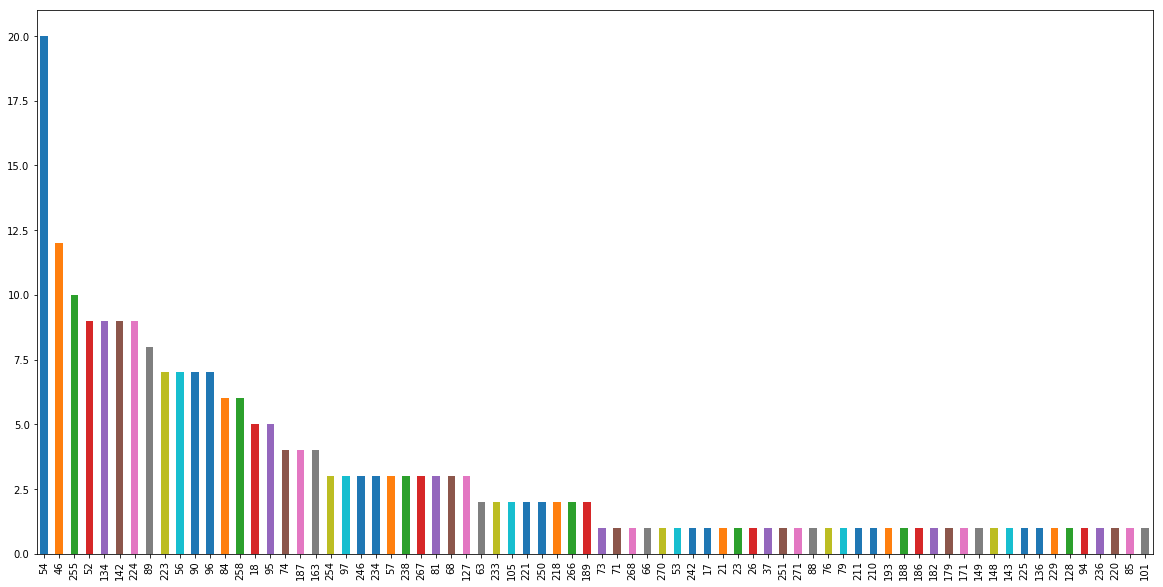

In [119]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


t.plot.bar()

In [123]:

df3 = pd.read_csv('order_csv.csv') # reads the csv and creates the dataframe called movie
df3.head()
# df2=df.drop(['id','user_id','value'],1)
# action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
#           'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}


# for k,i in df2.iterrows():
#     if i['action']==i['action']:
#         df2.loc[k,"actionc"]=action[i['action']]


,id,menu,amount,date,address,total,phone_number,slip_payment,delivery_charge,payment_method,coupon,created_at,store_id,user_id,morethings,status,isSuccess
0,181,{184},{1},2018-03-09 12:40:49.596791+00,หอ C10,55,"""0958171957""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-09 12:40:49.597613+00,1,96,NaN,กำลังส่ง,t
1,193,"{199,242}","{1,1}",2018-03-11 12:24:20.207649+00,หอ C-6,75,"""0908390241""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-11 12:24:20.208554+00,1,134,NaN,กำลังส่ง,t
2,173,"{""('345', '351', '356')""}",{1},2018-03-08 10:22:43.757011+00,หอ M0826639206,164,"""0826639206""",slip_payment/2018/03/08/28927819_7665739802003...,25,พร้อมเพย์,NaN,2018-03-08 10:22:43.758131+00,24,18,NaN,กำลังส่ง,t
3,48,{249},{4},2018-02-16 10:32:47+00,หอ C1,150,"""0826639206""",slip_payment/2018/02/16/IMG_20180214_231936247...,10,พร้อมเพย์,NaN,2018-02-16 10:32:47.663227+00,1,18,NaN,กำลังส่ง,t
4,47,{240},{2},2018-02-16 10:27:10+00,หอ C6,75,"""097-0788305""",slip_payment/2018/02/16/IMG_20180214_231936247...,5,พร้อมเพย์,NaN,2018-02-16 10:27:10.620342+00,1,18,NaN,กำลังส่ง,t


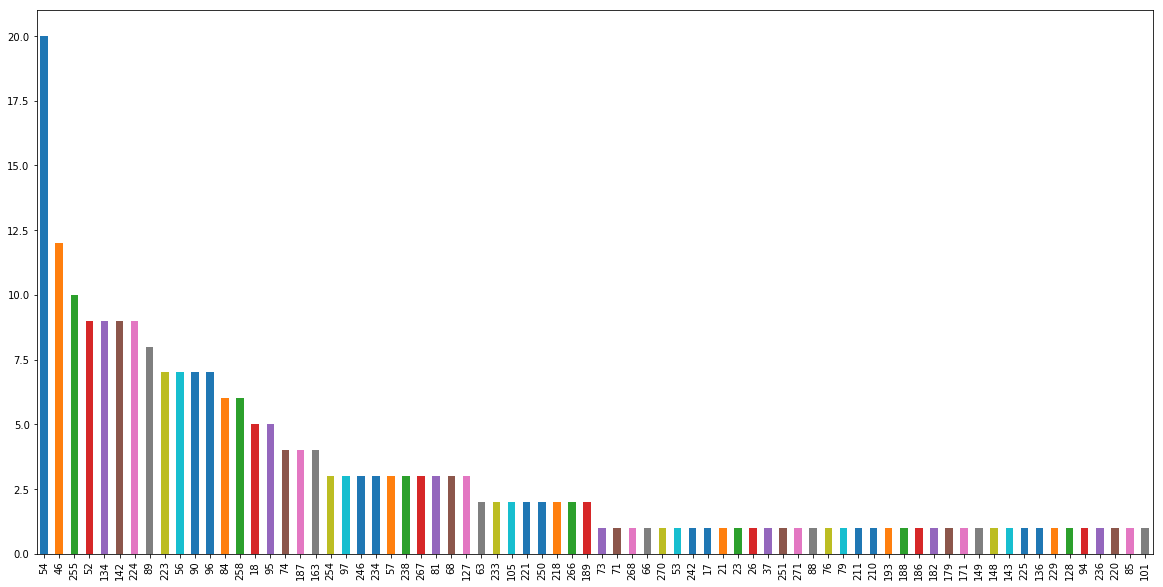

In [128]:
t = test['user_id'].value_counts()

t.plot.bar()

In [129]:
t

54     20
46     12
255    10
52      9
134     9
142     9
224     9
89      8
223     7
56      7
90      7
96      7
84      6
258     6
18      5
95      5
74      4
187     4
163     4
254     3
97      3
246     3
234     3
57      3
238     3
267     3
81      3
68      3
127     3
63      2
       ..
17      1
21      1
23      1
26      1
37      1
251     1
271     1
88      1
76      1
79      1
211     1
210     1
193     1
188     1
186     1
182     1
179     1
171     1
149     1
148     1
143     1
225     1
136     1
229     1
128     1
94      1
236     1
220     1
85      1
101     1
Name: user_id, Length: 74, dtype: int64